# CS3920 Assignment 2

#### Learning outcomes assessed

Be able to use and implement machine-learning algorithms, with the SVM,
neural networks, and cross-conformal prediction algorithms as examples. Have
an understanding of ways to apply the ideas and algorithms of machine learning
in industry.


## Question 1: Loading Datasets

Load the data set into Python using, e.g., load_wine or genfromtxt, as appropriate. In the case of the USPS dataset, merge the original training and test sets into one dataset.


### 1.1 Loading Wine Dataset


In [2]:
from sklearn.datasets import load_wine
import numpy as np

wine: np.ndarray = load_wine()
X_wine: np.ndarray = wine.data
y_wine: np.ndarray = wine.target

### 1.2 Loading USPS Dataset


In [89]:
zip_train: np.ndarray = np.genfromtxt("zip.train", delimiter=" ")
zip_train = zip_train[::5]

zip_test: np.ndarray = np.genfromtxt("zip.test", delimiter=" ")
zip_test = zip_test[::5]

zip_data: np.ndarray = np.concatenate((zip_train, zip_test), axis=0)
zip_data = zip_data[::5]

X_zip: np.ndarray = zip_data[:, 1:]
y_zip: np.ndarray = zip_data[:, 0]

## Question 2: Split dataset into training and a test set

Divide the dataset into a training set and a test set. You may use the function train_test_split. Use your birthday in the format DDMM as random_state (omit leading zeros if any).


In [80]:
from sklearn.model_selection import train_test_split

### 2.1 Splitting Wine Dataset


In [81]:
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine, y_wine, random_state=2708
)
print(X_wine_train.shape)
print(X_wine_test.shape)

(133, 13)
(45, 13)


### 2.1 Splitting USPS Dataset


In [90]:
X_zip_train, X_zip_test, y_zip_train, y_zip_test = train_test_split(
    X_zip, y_zip, random_state=2708
)
print(X_zip_train.shape)
print(X_zip_test.shape)

(279, 256)
(94, 256)


## Question 3: Using cross-validation, estimate generalization of the SVM

Using cross-validation and the training set only, estimate the generalization accuracy of the SVM with the default values of the parameters. You may use the function cross_val_score.


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np


class CrossValidation:
    def __init__(self, X_train, y_train, model, cv=5):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model.fit(X_train, y_train)
        self.cv = cv

    def get_model_accuracy(self):
        return self.model.score(self.X_test, self.y_test)

    def get_cross_val_score(self):
        # perform cross-validation
        scores = cross_val_score(self.model, self.X_train, self.y_train, cv=self.cv)
        # get average of scores
        score = np.mean(scores)
        return score

## Question 4: Find test error rate of the SVM

Find the test error rate of the SVM with the default values of parameters, compare it with the estimate obtained in the previous task (task 3), and write your observations in a markdown cell of your Jupyter notebook.


In [84]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np


class CrossValidation:
    def __init__(self, X_train, y_train, model, cv=3):
        self.X_train = X_train
        self.y_train = y_train
        self.model = model.fit(X_train, y_train)
        self.cv = cv

    def get_model_accuracy(self):
        return self.model.score(self.X_train, self.y_train)

    def get_cross_val_score(self):
        # perform cross-validation
        scores = cross_val_score(self.model, self.X_train, self.y_train, cv=self.cv)
        # get average of scores
        score = np.mean(scores)
        return score

    def get_model_error_rate(self):
        return 1 - self.get_model_accuracy()

    def get_cross_val_error_rate(self):
        return 1 - self.get_cross_val_score()

    def print_model_accuracy(self):
        print(f"Model score: {self.get_model_accuracy()}")
        print(f"Model error rate: {self.get_model_error_rate()}")
        print(f"Cross validation score: {self.get_cross_val_score()}")
        print(f"Cross validation error rate: {self.get_cross_val_error_rate()}")

## Q3/4:1 Cross validation on wine dataset


In [85]:
model = svm.SVC()
cross_validation_object = CrossValidation(X_wine_train, y_wine_train, model)
cross_validation_object.print_model_accuracy()

Model score: 0.7142857142857143
Model error rate: 0.2857142857142857
Cross validation score: 0.6914141414141414
Cross validation error rate: 0.30858585858585863


### Result analysis

As the model score is slightly better than the cross validation score of the model, we can conclude the model is very slightly worse than expected, as well as that the error rate when using cross validation was higher.

In general, the model performs poorly as the scores are low and the error rates are high.


## Q3/4:2 Cross validation on USPS dataset


In [91]:
model = svm.SVC()
cross_validation_object = CrossValidation(X_zip_train, y_zip_train, model)
cross_validation_object.print_model_accuracy()

Model score: 0.992831541218638
Model error rate: 0.007168458781361964
Cross validation score: 0.8637992831541218
Cross validation error rate: 0.1362007168458782


### Result analysis

The model score is much higher than the cross validation score. From that we can conclude that the model performed much worse than expected.

The model accuracy was high, but when using cross validation to evaluate the score, we can see a significant decrease in the score and increase in the error rate. In general, the model performs poorly, even more so than on the wine dataset, as the scores are low and the error rates are high.


## Question 5: Implement pipeline with normalization and SVC

Create a pipeline for SVM involving data normalization and SVC, and use grid search and cross-validation to tune parameters C and gamma for the pipeline, avoiding data snooping and data leakage. You may use the scikit-learn class GridSearchCV (along with other scikit-learn classes). Experiment with different ways of doing normalization (such as StandardScaler, MinMaxScaler, RobustScaler, and Normalizer). Which ways are appropriate for either dataset? (The answer, which should be written in your Jupyter notebook, may depend on the results that you obtain for the next task.)


### 5.1 GridSearch grid

We will use grid search and cross-validation to tune two parameters:

- C (svc\_\_C): Regularization parameter
- gamma (svc\_\_gamma) - determines flexibility and sensitivity of the model to the training data


In [92]:
param_grid_svm = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC


class PipelineObject:
    def __init__(self, X_train, y_train, scaler, model, cv=3):
        self.X = X_train
        self.y = y_train
        self.cv = cv
        self.pipeline = make_pipeline(scaler, model)

    def tune_parameters(self, param_grid):
        grid = GridSearchCV(self.pipeline, param_grid, cv=self.cv)
        grid.fit(self.X, self.y)
        self.pipeline = grid.best_estimator_
        return grid.best_estimator_

### Tuning parameters for wine dataset


In [94]:
from sklearn.preprocessing import MinMaxScaler

# Create object
wine_pipe = PipelineObject(X_wine_train, y_wine_train, MinMaxScaler(), SVC(), 3)

# Set parameter grid
param_grid_svm = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

# Call function to return best estimator
wine_tuned_params = wine_pipe.tune_parameters(param_grid_svm)

# Print best estimator
print(wine_tuned_params)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=1, gamma=1))])


### Tuning parameters for USPS dataset


In [95]:
# Create object
zip_pipe = PipelineObject(X_zip_train, y_zip_train, MinMaxScaler(), SVC(), 3)

# Set parameter grid
param_grid_svm = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

# Call function to return best estimator
zip_tuned_params = zip_pipe.tune_parameters(param_grid_svm)

# Print best estimator
print(f"USPS Dataset best estimator: {zip_tuned_params}")

USPS Dataset best estimator: Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc', SVC(C=100, gamma=0.001))])


### 5.2 Testing normalization

### Testing normalization methods for wine dataset


In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

normalization_methods = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

param_grid_svm = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

scores = []

for method in normalization_methods:
    pipe_object = PipelineObject(X_wine_train, y_wine_train, method, SVC(), 5)
    best_estimator = pipe_object.tune_parameters(param_grid_svm)
    best_estimator.fit(X_wine_train, y_wine_train)
    method_score = best_estimator.score(X_wine_test, y_wine_test)
    scores.append(method_score)
    print(f"{method} Score: {method_score}, Test error rare: {(1-method_score)*100}%")
    print(f"Estimator with best params: {best_estimator.named_steps['svc']}")
    print("_____________________________\n")

StandardScaler() Score: 0.9777777777777777, Test error rare: 2.2222222222222254%
Estimator with best params: SVC(C=10, gamma=0.1)
_____________________________

MinMaxScaler() Score: 0.9777777777777777, Test error rare: 2.2222222222222254%
Estimator with best params: SVC(C=1, gamma=1)
_____________________________

RobustScaler() Score: 0.9777777777777777, Test error rare: 2.2222222222222254%
Estimator with best params: SVC(C=1, gamma=0.1)
_____________________________

Normalizer() Score: 0.9333333333333333, Test error rare: 6.666666666666665%
Estimator with best params: SVC(C=100, gamma=100)
_____________________________



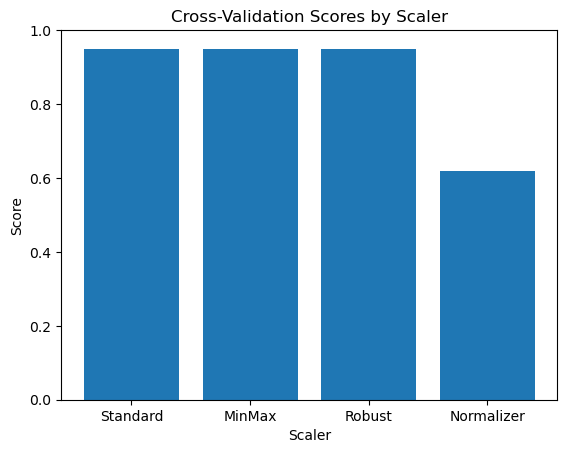

In [49]:
import matplotlib.pyplot as plt


def plot_bar_graph(data, title, xlabel, ylabel, lower_bound, upper_bound):
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(lower_bound, upper_bound)
    plt.show()


scores = {"Standard": 0.95, "MinMax": 0.95, "Robust": 0.95, "Normalizer": 0.62}
plot_bar_graph(scores, "Cross-Validation Scores by Scaler", "Scaler", "Score", 0, 1)

### Testing Normalization for USPS dataset


In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

normalization_methods = [StandardScaler(), MinMaxScaler(), RobustScaler(), Normalizer()]

param_grid_svm = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

scores = []

for method in normalization_methods:
    pipe_object = PipelineObject(X_zip_train, y_zip_train, method, SVC(), 5)
    best_estimator = pipe_object.tune_parameters(param_grid_svm)
    best_estimator.fit(X_zip_train, y_zip_train)
    method_score = best_estimator.score(X_zip_test, y_zip_test)
    scores.append(method_score)
    print(f"{method} Score: {method_score}, Test error rare: {(1-method_score)*100}%")
    print(f"Estimator with best params: {best_estimator.named_steps['svc']}")
    print("_____________________________\n")

StandardScaler() Score: 0.9148936170212766, Test error rare: 8.510638297872342%
Estimator with best params: SVC(C=10, gamma=0.001)
_____________________________

MinMaxScaler() Score: 0.9148936170212766, Test error rare: 8.510638297872342%
Estimator with best params: SVC(C=10, gamma=0.01)
_____________________________

RobustScaler() Score: 0.6914893617021277, Test error rare: 30.85106382978723%
Estimator with best params: SVC(C=10, gamma=0.001)
_____________________________

Normalizer() Score: 0.9042553191489362, Test error rare: 9.57446808510638%
Estimator with best params: SVC(C=10, gamma=0.1)
_____________________________



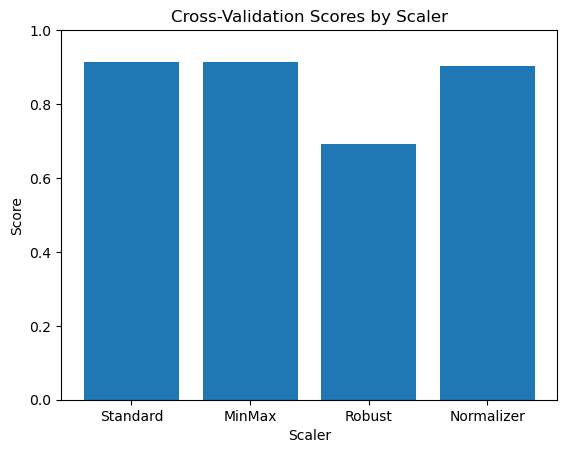

In [50]:
import matplotlib.pyplot as plt


def plot_bar_graph(data, title, xlabel, ylabel, lower_bound, upper_bound):
    plt.bar(data.keys(), data.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(lower_bound, upper_bound)
    plt.show()


scores = {"Standard": 0.914, "MinMax": 0.914, "Robust": 0.691, "Normalizer": 0.904}
plot_bar_graph(scores, "Cross-Validation Scores by Scaler", "Scaler", "Score", 0, 1)

### Question 5 analysis

In the previous code cell I have created a PipelineObject class that does the following:

- instantiates a pipeline object with the model and scaler passed as arguments.
- includes a tune_parameters function that tunes parameters C and gamma

When creating two instances of the object and calling the tune_parameters function with the datasets for this assignment, we got two different results.

For the wine dataset, the parameter tuning function returned parameters C=1, gamma=1 using the MinMax as the scaler. After comparing the different scaling options, all returned similar values with normalizer being the only one performing below 97%. That means that the best model found is using any normalization method other than normalizer and parameters C=1 and gamma=1.

For the USPS dataset, the parameter tuning function returned parameters C=10, gamma=0.01 using the MinMax as the scaler. After comparing the different scaling options, all returned similar values with Robust being the only one performing below 90%. That means that the best model found is using standard or minmax normalization methods and parameters C=10 and gamma=0.01.


## Question 6: Find test error rate of best estimators

Fit the GridSearchCV object of task 5 to the training set and use it to
predict the test labels. Write the resulting test error rate in your Jupyter
notebook.


In [47]:
# Set parameter grid
param_grid_svm = {
    "svc__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "svc__gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

# Create pipelines
wine_pipe = PipelineObject(
    X_wine_train, y_wine_train, MinMaxScaler(), SVC(), 5
).tune_parameters(param_grid_svm)
zip_pipe = PipelineObject(
    X_zip_train, y_zip_train, MinMaxScaler(), SVC(), 5
).tune_parameters(param_grid_svm)


wine_pipe.fit(X_wine_train, y_wine_train)
zip_pipe.fit(X_zip_train, y_zip_train)

predictions_wine = wine_pipe.predict(X_wine_test)
predictions_zip = zip_pipe.predict(X_zip_test)

print(
    f"Test error rate of wine dataset: {(1 - (np.mean(predictions_wine == y_wine_test)))*100}%"
)
print(
    f"Test error rate of USPS dataset: {(1 - (np.mean(predictions_zip == y_zip_test)))*100}%"
)

Test error rate of wine dataset: 2.2222222222222254%
Test error rate of USPS dataset: 8.510638297872342%


# Lab 08 CS3920: Neural nets and SVM


## 1 Neural nets

We will build a neural net for a 2D classification dataset called two_moons. The dataset consists of two half-moon shapes, with each class consisting of equal numbers of samples. Simple neural networks, of the kind we are studying, are sometimes referred to as multi-layer perceptrons. This is why this model is called MLPClassifier in scikit-learn.


Text(0, 0.5, 'Feature 1')

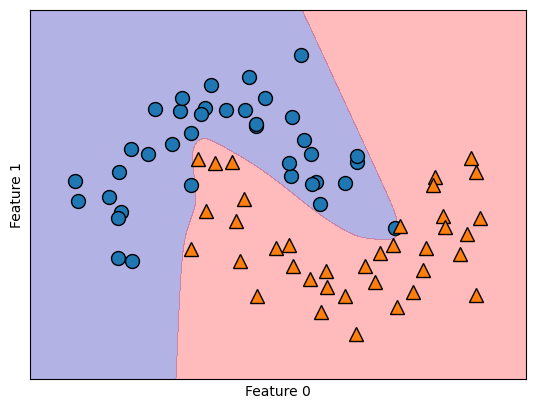

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
X,y = make_moons(n_samples=100, noise=0.25, random_state=2708)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2708)

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=2708, hidden_layer_sizes=[10]).fit(X_train,y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Question 7: Conformal predictor


## 7.1 Conformal predictor for wine dataset


In [70]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, random_state=2708, shuffle=True)

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "gamma": [0.001, 0.01, 0.1, 1, 10, 100],
}

for train_index, test_index in kfold.split(X_wine):
    # split wine dataset into training and test sets
    X_train, X_test = X_wine[train_index], X_wine[test_index]
    y_train, y_test = y_wine[train_index], y_wine[test_index]

    # use grid search to tune params
    svm = SVC(probability=True)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

# compute predicted probs for each sample in the test set
predicted_probs = grid_search.best_estimator_.predict_proba(X_test)

# compute conformity scores for each test sample
conformity_scores: list[float] = []
for index, element in enumerate(X_test):
    probs = predicted_probs[index]
    conformity_score = max(probs)
    conformity_scores.append(conformity_score)

# compute the error rates for different significance levels
error_rates = []
significance_levels = []
for significance_level in np.arange(0, 1, 0.01):
    count = 0
    # compute the number of conformity scores in the test set that are less than the significance level
    for conformity_score in conformity_scores:
        if conformity_score < significance_level:
            count += 1

    # error rate = count / len_of_test_set
    error_rate = count / len(X_test)
    error_rates.append(error_rate)
    significance_levels.append(significance_level)

print("Error rates:", np.mean(error_rates))
print("Minimum error rate:", min(error_rates))
print("Average p-value:", sum(conformity_scores) / len(conformity_scores))

Error rates: 0.25857142857142856
Minimum error rate: 0.0
Average p-value: 0.7361929603158228
